<a href="https://www.kaggle.com/code/swift27/bearing-health-classi-16june?scriptVersionId=246860098" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inference/135.mat
/kaggle/input/testing/109.mat
/kaggle/input/testing/OR0076_2.mat
/kaggle/input/test-final/IR028_0.mat
/kaggle/input/bearing-data/B021_2.mat
/kaggle/input/bearing-data/B028_3.mat
/kaggle/input/bearing-data/IR007_3.mat
/kaggle/input/bearing-data/IR014_3.mat
/kaggle/input/bearing-data/OR00712_2.mat
/kaggle/input/bearing-data/IR028_2.mat
/kaggle/input/bearing-data/B014_3.mat
/kaggle/input/bearing-data/IR014_0.mat
/kaggle/input/bearing-data/IR007_2.mat
/kaggle/input/bearing-data/OR0073_1.mat
/kaggle/input/bearing-data/Normal_3.mat
/kaggle/input/bearing-data/B021_1.mat
/kaggle/input/bearing-data/B028_1.mat
/kaggle/input/bearing-data/IR014_1.mat
/kaggle/input/bearing-data/Normal_1.mat
/kaggle/input/bearing-data/OR0076_1.mat
/kaggle/input/bearing-data/B007_1.mat
/kaggle/input/bearing-data/B014_0.mat
/kaggle/input/bearing-data/OR0146_2.mat
/kaggle/input/bearing-data/B014_1.mat
/kaggle/input/bearing-data/OR0216_3.mat
/kaggle/input/bearing-data/B028_0.mat
/kaggle/i

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import spectrogram
from scipy.stats import kurtosis, skew
from tqdm import tqdm
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

2025-06-22 21:05:44.980921: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750626345.162968      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750626345.214954      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


100%|██████████| 62/62 [00:04<00:00, 15.33it/s]


Final dataset:
Total samples: 576
Image shape: (128, 128, 1)
Label distribution: {0: 112, 1: 120, 2: 216, 3: 128}


I0000 00:00:1750626361.964009      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,288,516 (16.36 MB)

 Trainable params: 4,288,068 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/35


I0000 00:00:1750626367.000985      59 service.cc:148] XLA service 0x7b4fcc004660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750626367.001669      59 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750626367.414488      59 cuda_dnn.cc:529] Loaded cuDNN version 90300


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3604 - loss: 7.1805

I0000 00:00:1750626370.882296      59 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 387ms/step - accuracy: 0.3764 - loss: 7.0459 - val_accuracy: 0.1739 - val_loss: 17.8428
Epoch 2/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7324 - loss: 1.1733 - val_accuracy: 0.1739 - val_loss: 23.0076
Epoch 3/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8476 - loss: 0.4365 - val_accuracy: 0.1739 - val_loss: 17.6128
Epoch 4/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9444 - loss: 0.1789 - val_accuracy: 0.1739 - val_loss: 14.7837
Epoch 5/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9500 - loss: 0.1071 - val_accuracy: 0.1957 - val_loss: 11.1224
Epoch 6/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9429 - loss: 0.1345 - val_accuracy: 0.2391 - val_loss: 8.1082
Epoch 7/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9586 - loss: 0.0809 - val_accuracy: 0.2391 - val_loss: 7.2469
Epoch 8/35
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9885 - loss: 0.0350 - val_accuracy: 0.2391 - val_l

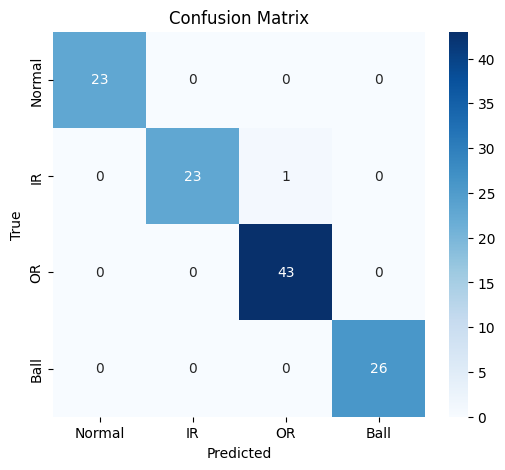

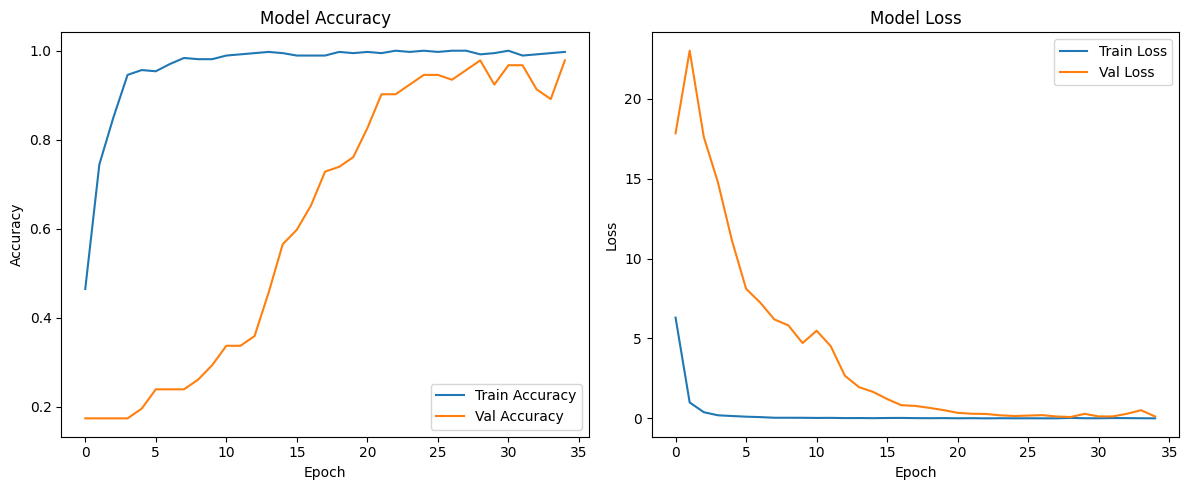

In [3]:
import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm
from scipy.io import loadmat
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# --- Config ---
sampling_rate = 12000
window_sec = 5
out_shape = (128, 128)
data_path = "/kaggle/input/bearing-data"

# --- Label Mapper ---
def classify_file(filename):
    if "IR" in filename: return 1
    if "OR" in filename: return 2
    if "B0" in filename: return 3
    if "Normal" in filename or "97" in filename: return 0
    return -1

# --- Segment Signal ---
def segment_signal(signal, fs, window_sec):
    win_len = fs * window_sec
    return [signal[i:i+win_len] for i in range(0, len(signal), win_len) if len(signal[i:i+win_len]) == win_len]

# --- Spectrogram Conversion ---
def segment_to_spectrogram(segment, fs, out_shape):
    f, t, Sxx = spectrogram(segment, fs, nperseg=256, noverlap=128)
    Sxx_db = 10 * np.log10(Sxx + 1e-8)
    h, w = min(Sxx_db.shape[0], out_shape[0]), min(Sxx_db.shape[1], out_shape[1])
    out = np.zeros(out_shape)
    out[:h, :w] = Sxx_db[:h, :w]
    return out

# --- Augmentation Helpers ---
def amplitude_scaling(seg, scale_range=(0.8, 1.2)):
    scale = np.random.uniform(*scale_range)
    return seg * scale

def frequency_masking(spec, num_masks=1, freq_masking_max_percentage=0.15):
    spec = spec.copy()
    num_freqs = spec.shape[0]
    for _ in range(num_masks):
        f = int(np.random.uniform(0.0, freq_masking_max_percentage) * num_freqs)
        f0 = np.random.randint(0, num_freqs - f)
        spec[f0:f0 + f, :] = 0
    return spec

# --- Load and Augment Dataset ---
X, y = [], []
mat_files = glob.glob(os.path.join(data_path, "*.mat"))

for filepath in tqdm(mat_files):
    try:
        label = classify_file(os.path.basename(filepath))
        if label == -1:
            continue

        data = loadmat(filepath)
        key = [k for k in data.keys() if "DE_time" in k][0]
        signal = data[key].ravel()
        segments = segment_signal(signal, sampling_rate, window_sec)

        for seg in segments:
            base_spec = segment_to_spectrogram(seg, sampling_rate, out_shape)

            # Original
            X.append(base_spec)
            y.append(label)

            # Gaussian Noise
            noisy = seg + np.random.normal(0, 0.08, size=seg.shape)
            X.append(segment_to_spectrogram(noisy, sampling_rate, out_shape))
            y.append(label)

            # Amplitude Scaled
            scaled = amplitude_scaling(seg)
            X.append(segment_to_spectrogram(scaled, sampling_rate, out_shape))
            y.append(label)

            # Frequency Masking
            masked_spec = frequency_masking(base_spec)
            X.append(masked_spec)
            y.append(label)

    except Exception as e:
        print(f"Error processing {filepath}: {e}")

X = np.array(X)[..., np.newaxis]
y = np.array(y)

print("Final dataset:")
print("Total samples:", X.shape[0])
print("Image shape:", X.shape[1:])
print("Label distribution:", pd.Series(y).value_counts().sort_index().to_dict())

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- Compute Class Weights ---
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# --- CNN Model Definition ---
model = tf.keras.Sequential([
    tf.keras.Input(shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --- Train Model ---
history = model.fit(X_train, y_train,
                    epochs=35,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    verbose=1)

# --- Save Model ---
model.save("bearing_fault_cnn_model2.h5")  # Or use "bearing_fault_cnn_model" for SavedModel format

# --- Evaluate Model ---
y_pred = model.predict(X_test).argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)

print("\nTest Accuracy:", round(accuracy, 4))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'IR', 'OR', 'Ball'],
            yticklabels=['Normal', 'IR', 'OR', 'Ball'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# --- Training History Plots ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
# ✅ Bearing Fault UI with CNN + LLM for Kaggle Notebook (Enhanced Prompt + Few-Shot)

!pip install ipywidgets --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import spectrogram, periodogram
from scipy.stats import kurtosis, skew
import tensorflow as tf
import requests
import os
import ipywidgets as widgets
from IPython.display import display, clear_output
import glob

# --- Config ---
sampling_rate = 12000
window_sec = 5
out_shape = (128, 128)
label_map = {0: "Normal", 1: "IR", 2: "OR", 3: "Ball"}
reverse_label_map = {v: k for k, v in label_map.items()}
groq_api_key = "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"
groq_url = "https://api.groq.com/openai/v1/chat/completions"

# --- Load CNN Model ---
def load_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(128, 128, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    model.load_weights("/kaggle/working/bearing_fault_cnn_model2.h5")
    return model

# --- Signal Processing ---
def segment_signal(signal, fs, window_sec):
    win_len = fs * window_sec
    return [signal[i:i+win_len] for i in range(0, len(signal), win_len) if len(signal[i:i+win_len]) == win_len]

def segment_to_spectrogram(segment, fs, out_shape):
    f, t, Sxx = spectrogram(segment, fs, nperseg=256, noverlap=128)
    Sxx_db = 10 * np.log10(Sxx + 1e-8)
    h, w = min(Sxx_db.shape[0], out_shape[0]), min(Sxx_db.shape[1], out_shape[1])
    out = np.zeros(out_shape)
    out[:h, :w] = Sxx_db[:h, :w]
    return out

def extract_features(signal):
    rms = np.sqrt(np.mean(signal**2))
    k = kurtosis(signal)
    s = skew(signal)
    p2p = np.ptp(signal)
    crest = np.max(np.abs(signal)) / rms
    f, Pxx = periodogram(signal, sampling_rate)
    dom_freq = f[np.argmax(Pxx)]
    return {
        "rms": round(rms, 4),
        "kurtosis": round(k, 4),
        "skewness": round(s, 4),
        "peak_to_peak": round(p2p, 4),
        "crest_factor": round(crest, 4),
        "dominant_freq": int(dom_freq)
    }

# --- Improved Prompt with Context + Few-Shot ---
def create_prompt(features):
    return f"""
You are an expert in bearing fault diagnosis. Use the following features extracted from a 5-second vibration segment to classify the fault:

- RMS (Root Mean Square): {features['rms']} → vibration energy
- Kurtosis: {features['kurtosis']} → impulsiveness
- Skewness: {features['skewness']} → signal asymmetry
- Peak-to-Peak: {features['peak_to_peak']} → extreme deviation
- Crest Factor: {features['crest_factor']} → high peak relative to RMS
- Dominant Frequency: {features['dominant_freq']} Hz → main frequency in signal

Typical patterns:
- IR faults tend to have low kurtosis, near-zero skewness, and high dominant frequencies. Even if peak-to-peak and crest factor are high, spectral shape and distribution matter more.
- OR faults often show high kurtosis, high crest factor, and moderate to high RMS. Even if dominant frequency is high, waveform shape plays a bigger role.
- Ball faults show moderate energy, moderate kurtosis, and fluctuating crest factor with irregular dominant frequency peaks.
- Normal signals have low crest factor, low kurtosis, and low vibration energy.

Examples:
User: RMS: 0.12, Kurtosis: 0.09, Skewness: 0.01, Peak-to-Peak: 1.02, Crest Factor: 3.88, Dominant Frequency: 1400 Hz
Assistant: Normal

User: RMS: 0.9, Kurtosis: 1.2, Skewness: 0.6, Peak-to-Peak: 7.1, Crest Factor: 6.0, Dominant Frequency: 520 Hz
Assistant: OR

User: RMS: 0.83, Kurtosis: 0.36, Skewness: 0.11, Peak-to-Peak: 7.81, Crest Factor: 5.28, Dominant Frequency: 641 Hz
Assistant: IR

User: RMS: 0.56, Kurtosis: 4.84, Skewness: 0.02, Peak-to-Peak: 6.08, Crest Factor: 5.43, Dominant Frequency: 3462 Hz
Assistant: OR

User: RMS: 0.67, Kurtosis: 2.01, Skewness: 0.42, Peak-to-Peak: 4.9, Crest Factor: 4.8, Dominant Frequency: 1210 Hz
Assistant: Ball

Now, given this new set:

RMS: {features['rms']}
Kurtosis: {features['kurtosis']}
Skewness: {features['skewness']}
Peak-to-Peak: {features['peak_to_peak']}
Crest Factor: {features['crest_factor']}
Dominant Frequency: {features['dominant_freq']} Hz

What is the most likely fault type? Respond only with one of: Normal, IR, OR, Ball.
"""

# --- Groq LLM Query ---
def query_llm(features):
    headers = {
        "Authorization": f"Bearer {groq_api_key}",
        "Content-Type": "application/json"
    }
    payload = {
        "model": "deepseek-r1-distill-llama-70b",
        "messages": [
            {"role": "system", "content": "You are a bearing fault diagnosis expert."},
            {"role": "user", "content": create_prompt(features)}
        ]
    }
    try:
        r = requests.post(groq_url, headers=headers, json=payload)
        print("🔍 Raw Groq Response:", r.json())
        return r.json()["choices"][0]["message"]["content"].strip().split("\n")[-1].strip().capitalize()
    except Exception as e:
        return f"LLM ERROR: {e}"

# --- UI Logic ---
output_area = widgets.Output()

def predict(file_path):
    with output_area:
        clear_output()
        print(f"📂 Processing file: {os.path.basename(file_path)}")

        mat = loadmat(file_path)
        key = [k for k in mat if "DE_time" in k][0]
        signal = mat[key].ravel()
        segments = segment_signal(signal, sampling_rate, window_sec)

        if not segments:
            print("❌ No valid 5-second segment found.")
            return

        segment = segments[0]
        spec = segment_to_spectrogram(segment, sampling_rate, out_shape)
        model = load_model()
        pred = model.predict(np.expand_dims(spec, axis=(0, -1)))[0]
        cnn_pred = label_map[np.argmax(pred)]
        cnn_conf = float(np.max(pred))

        features = extract_features(segment)
        llm_pred = query_llm(features)

        print(f"\n🧠 LLM Prediction: {llm_pred}")
        print(f"🤖 CNN Prediction: {cnn_pred} ({cnn_conf:.2%})")
        print("📊 Extracted Features:", features)

        if llm_pred.upper() == cnn_pred.upper():
            print("✅ Both models agree.")
        else:
            print("⚠️ Models disagree.")


        plt.figure(figsize=(10, 3))
        plt.plot(segment[:2000])
        plt.title("First 2000 points of vibration segment")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()

# --- UI Dropdown with All Folders ---
mat_files = sorted(glob.glob("/kaggle/input/testing/**/*.mat", recursive=True) +
                   glob.glob("/kaggle/input/inference/**/*.mat", recursive=True) +
                   glob.glob("/kaggle/input/test-final/**/*.mat", recursive=True) +
                   glob.glob("/kaggle/input/bearing-data/**/*.mat", recursive=True))

dropdown = widgets.Dropdown(
    options=[(f"{os.path.basename(os.path.dirname(f))} ➜ {os.path.basename(f)}", f) for f in mat_files],
    description='Select .mat:',
    layout=widgets.Layout(width='90%')
)

button = widgets.Button(description="Run Prediction", button_style='success')

def on_button_click(b):
    predict(dropdown.value)

button.on_click(on_button_click)
display(dropdown, button, output_area)


Dropdown(description='Select .mat:', layout=Layout(width='90%'), options=(('bearing-data ➜ B007_0.mat', '/kagg…

Button(button_style='success', description='Run Prediction', style=ButtonStyle())

Output()